In [7]:
##############################################################################
#
# This code is part of the publication:
# https://www.biorxiv.org/content/10.1101/2020.11.30.403840v1
#
# The generation of cortical novelty responses through inhibitory plasticity
# Auguste Schulz*, Christoph Miehl*, Michael J. Berry II, Julijana Gjorgjieva
#
# * equal contribution
#
##############################################################################

# Figure 5 SSA

Author: Auguste Schulz  
1. Schematic
2. Population response disinhibition
3. Denseness presentation
4. Dininhibition strength

In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

#reload(helper_functions)
from helper_functions import *

from evaluation_functions import *
import evaluation_functions

#reload(evaluation_functions)
from evaluation_functions import *

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def count(list1, l, r): 
    c = 0
    # traverse in the list1 
    for x in list1: 
        # condition check 
        if x>= l and x<= r: 
            c+= 1
    return c 

def get_time_idx(time, onsets):
    idx = []
    for tt in onsets:
        #print(tt)
        #print(min(min(np.where(tt<=time))))
        idx.append(min(min(np.where(time>=tt))))
        
    return idx

figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

In [3]:
# Final runs used in figure
# No pretraining in STDP cases the adjust factor is 1 
file_names = [
    # adaptation but no iSTDP
    "SSA_200_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadapttrueiSTDPfalseRateAdjust0Time2020-03-04-11-55-39repeatedsequences.h5",
    # iSTDP no adaptation
    "SSA_200_inhibtunning_0.0_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-04-19-07-29repeatedsequences.h5",
    # disinhibition modelled with subtraction of 1.0 kHz 
    "SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-03-22-54-09repeatedsequences.h5",
    # inhibitory tuning case with 1.2 kHz added to inhibitory assemblies 
    "SSA_200_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-04-15-59-14repeatedsequences.h5"
]


In [4]:
E_all  = []
E_all_nov  = []

I_all = []
ed_all = []
FIG_DIR_ALL = []
Xweight_all = []
Xweightinhib_all = []

ItoAweight_all = []
timevector_all = []
avgweightEmem_all = []
avgweightImem_all = []
avgweightEnov_all = []
avgweightImem_all = []
avgwindow = 8
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")


RUN_DIR = "../data/"
RESULTS_DIR = "../results/"

FILE_NAME_RUN = [RUN_DIR + file_name for file_name in file_names]
#file_name_run = run_folder + file_name
# open file
frun = h5py.File(FILE_NAME_RUN[0], "r")

FILE_NAME_RUN[-1]
dict_dursimspikes_last  = frun["dursimspikes"]
dict_dursimspikes_keys = dict_dursimspikes_last.keys()
dict_dursimspikes_keys;
adjustfact  = frun["params"]['adjustfactorinhib2'].value
stimulus  = frun["initial"]['stimulus'].value
ptretrain  = frun["initial"]['lengthpretrain'].value

print(stimulus[:,-1])
print(stimulus[2,ptretrain])
dict_dursimspikes_last= frun["dursimspikes"].keys()
dict_dursimspikes_last;
print(frun["initial"].keys())

[1.00e+00 2.68e+04 2.71e+04 1.20e+01]
4300.0
<KeysViewHDF5 ['assemblymembers', 'idxblockonset', 'inhibassemblies', 'lengthpretrain', 'seqnumber', 'stimparams', 'stimparams_prestim', 'stimulus', 'weights']>


/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
for i,fn in enumerate(file_names):
    print(fn)
    
    E,I, ed, E_hist, E_hist_boxcar, FIG_DIR, E_nov = analyse_filename(fn, avgwindow=avgwindow, timestr=timestr, RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
    #print(fn)
    E_all.append(E)
    I_all.append(I)
    ed_all.append(ed)
    E_all_nov.append(E_nov)
    FIG_DIR_ALL.append(FIG_DIR)
    if i==3:
        Xweight, ItoAweight, timevector_weights, avgweightEmem, avgweightImem, avgweightEnov, avgweightImem, It1, It2, InhibXweight, seqnumber, stimulus, colormain, idxblockonset= analyse_weights(fn, True, figsize=(10,5), RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)
spiketimes = 0
gc.collect()

Nseq = 1

SSA_200_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadapttrueiSTDPfalseRateAdjust0Time2020-03-04-11-55-39repeatedsequences.h5
ADAPT ON
SSA_200_inhibtunning_0.0_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-04-19-07-29repeatedsequences.h5
NON ADAPTIVE
SSA_200_disinhib_true_SUB_1.0_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-03-22-54-09repeatedsequences.h5
NON ADAPTIVE
SSA_200_inhibtunning_0.1_ifinhibhetero_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-04-15-59-14repeatedsequences.h5
NON ADAPTIVE


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


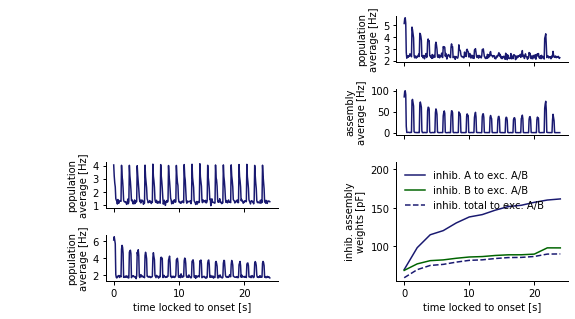

In [6]:
E_adapt = E_all[0][0]
ed_adapt = ed_all[0]
E_iSTDP = E_all[1][0]
ed_iSTDP = ed_all[1]
E_SSA = E_all[3][0]
ed_SSA = ed_all[3]
E_disin = E_all[2][0]
ed_disin = ed_all[2]
E_nov_SSA = E_all_nov[3][0][0]
ed_nov_SSA = ed_all[3]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


axiswidth=1
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
figsize_cm = (20,11)
figsize_inch = cm2inch(figsize_cm)
figsize_inch
fig2 = plt.figure(constrained_layout=True, figsize=figsize_inch)
gs = fig2.add_gridspec(4,8, hspace=1.5, wspace = 1)


f2_ax2 = fig2.add_subplot(gs[2,1:4]) 

f2_ax3 = fig2.add_subplot(gs[3,1:4], sharex=f2_ax2)

f2_ax5 = fig2.add_subplot(gs[0,5:])

f2_ax6 = fig2.add_subplot(gs[1,5:], sharex=f2_ax5)

f2_ax7 = fig2.add_subplot(gs[2:,5:], sharex=f2_ax5)



plt.setp(f2_ax2.get_xticklabels(), visible=False)
plt.setp(f2_ax5.get_xticklabels(), visible=False)
plt.setp(f2_ax6.get_xticklabels(), visible=False)

for aa, ax in enumerate([f2_ax2,f2_ax3,f2_ax5,f2_ax6, f2_ax7]):
    for axis in ['bottom', 'left']:
            ax.spines[axis].set_linewidth(axiswidth)
    for axis in ['top', 'right']:
        ax.spines[axis].set_linewidth(0)
    ax.xaxis.set_tick_params(width=axiswidth)
    ax.yaxis.set_tick_params(width=axiswidth)
    ax.locator_params(tight=True, nbins=4)

color = ["midnightblue","lightskyblue","royalblue","darkred","darksalmon", "saddlebrown","darkgreen","greenyellow","darkolivegreen","darkmagenta","thistle","indigo","darkorange","tan","sienna", "black", "silver","dimgrey", "fuchsia", "orchid","plum",  "lightseagreen", "lightcyan", "darkslategray",  "goldenrod","gold", "wheat","forestgreen", "aquamarine", "palegreen"]

cutoff = 1

# # ================================================ standard =================================================
# for i, trace in enumerate(reversed(E_std)):
#     #print(i)
f2_ax5.plot(ed_SSA[:-cutoff], E_SSA[:-cutoff], color = 'midnightblue', label='std')#f2_ax2.plot(ed_SSA[:-cutoff], E_SSA[:-cutoff], '--',color = 'darkgreen')

#f2_ax5.legend(frameon=False)
f2_ax5.set(ylabel ="population\naverage [Hz]")

f2_ax3.plot(ed_iSTDP[:-cutoff], E_iSTDP[:-cutoff], color = 'midnightblue', label='no inhib tuning')
#f2_ax3.legend(frameon=False)
f2_ax3.set(ylabel ="population\naverage [Hz]", xlabel = "time locked to onset [s]")

f2_ax2.plot(ed_adapt[:-cutoff], E_adapt[:-cutoff], color = 'midnightblue', label='adaptive')
#f2_ax2.legend(frameon=False)
f2_ax2.set(ylabel ="population\naverage [Hz]")

f2_ax6.plot(ed_SSA[:-cutoff], E_nov_SSA[:-cutoff], color = 'midnightblue', label='stimulated neurons')
#f2_ax5.plot(ed_SSA[:-cutoff], E_nov_SSA[:-cutoff], ':',color = 'darkgreen')#, label='stimulated neurons')

#f2_ax6.legend(frameon=False)
f2_ax6.set(ylabel ="assembly\naverage [Hz]")

onset_times = stimulus[1,idxblockonset-1]
timevector = timevector_weights*60
idx_1 = get_time_idx(timevector, onset_times/1000)

f2_ax7.plot(timevector[idx_1[0]:]-timevector[idx_1[0]],InhibXweight[0,0,idx_1[0]:], color='midnightblue', label = 'inhib. A to exc. A/B')
f2_ax7.plot(timevector[idx_1[0]:]-timevector[idx_1[0]],InhibXweight[1,1,idx_1[0]:], color='darkgreen', label = 'inhib. B to exc. A/B')
f2_ax7.plot(timevector[idx_1[0]:]-timevector[idx_1[0]],ItoAweight[0,idx_1[0]:], '--', color='midnightblue', label = 'inhib. total to exc. A/B')
f2_ax7.legend(frameon=False)
f2_ax7.set(ylabel ="inhib. assembly\nweights [pF]", xlabel = "time locked to onset [s]")
f2_ax7.set(ylim=[55, 210])

save_fig("./figures/","Figure_5_SSA_300ms_900ms")